In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

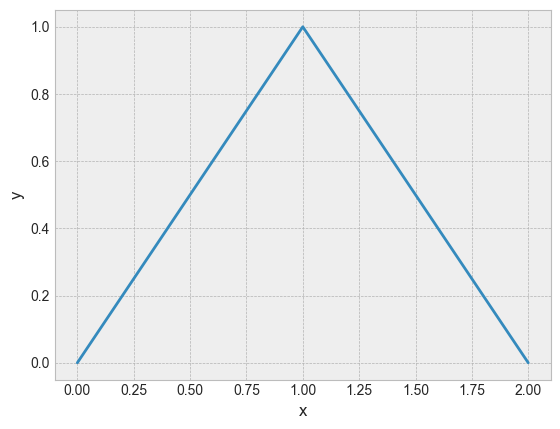

In [4]:
plt.plot(
        [0, 1, 2],  # X-values
        [0, 1, 0]   # Y-values
)
# The next two lines add labels to the axes.
plt.xlabel('x')
plt.ylabel('y');

In [5]:
def plot_coords(coords, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y)

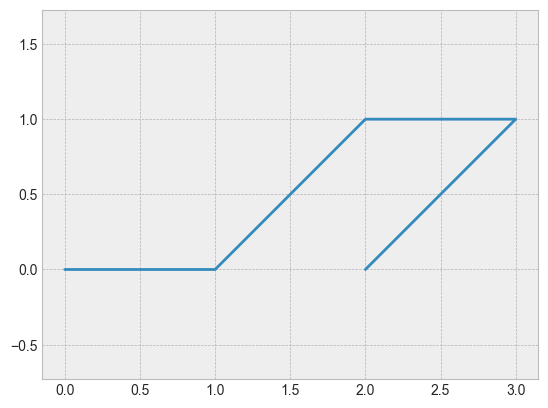

In [6]:
plot_coords([
        (0, 0),
        (1, 0),
        (2, 1),
        (3, 1),
        (2, 0)
])

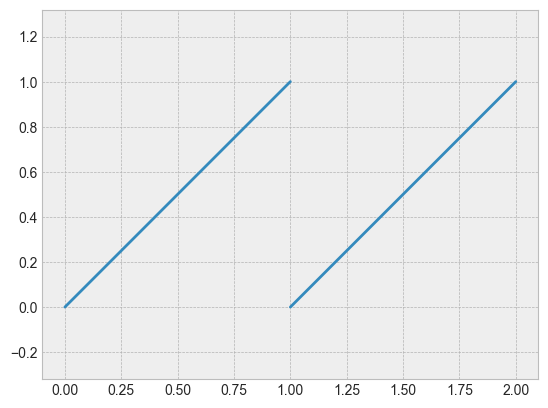

In [7]:
nan = float('nan')
plot_coords([
        (0, 0),
        (1, 1),
        (nan, nan),
        (1, 0),
        (2, 1)
])

In [8]:
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180

In [9]:
def turtle_to_coords(turtle_program, turn_amount=45):
    # The state variable tracks the current location and angle of the turtle.
    # The turtle starts at (0, 0) facing up (90 degrees).
    state = (0.0, 0.0, 90.0)

    # Throughout the turtle's journey, we "yield" its location. These coordinate
    # pairs become the path that plot_coords draws.
    yield (0.0, 0.0)

    # Loop over the program, one character at a time.
    for command in turtle_program:
        x, y, angle = state

        if command in 'Ff':      # Move turtle forward
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)

            if command == 'f':
                # Insert a break in the path so that
                # this line segment isn't drawn.
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':     # Turn turtle clockwise without moving
            state = (x, y, angle + turn_amount)

        elif command == '-':     # Turn turtle counter-clockwise without moving
            state = (x, y, angle - turn_amount)

        # Note: We silently ignore unknown commands

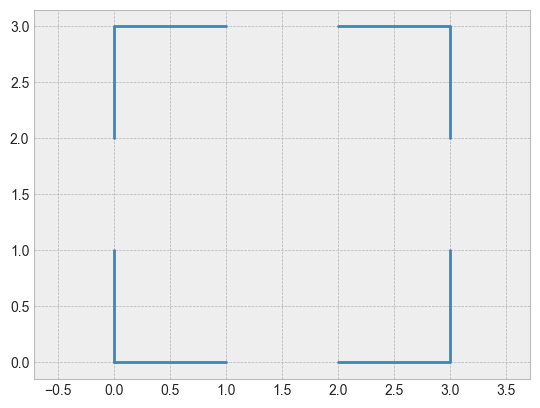

In [10]:
plot_coords(turtle_to_coords('FfF++FfF++FfF++FfF'))

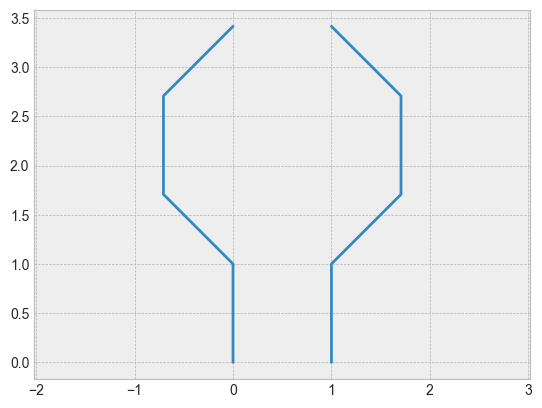

In [11]:
plot_coords(turtle_to_coords('F-F+F+F+f+F+F+F-F'))

In [12]:
from math import isnan
def print_coords(coords):
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

print_coords(turtle_to_coords('F-F+F+F+f+F+F+F-F'))

(0.00, 0.00)
(-0.00, 1.00)
(-0.71, 1.71)
(-0.71, 2.71)
(-0.00, 3.41)
<gap>
(1.00, 3.41)
(1.71, 2.71)
(1.71, 1.71)
(1.00, 1.00)
(1.00, -0.00)


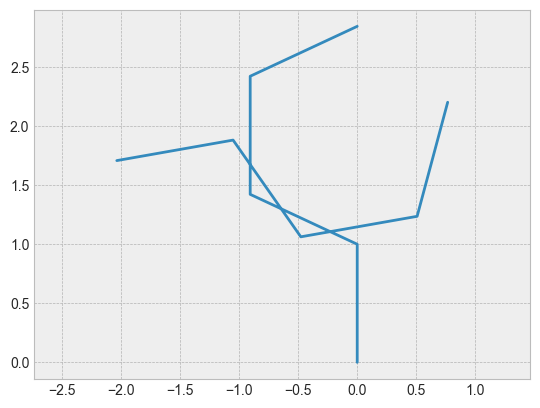

In [13]:
plot_coords(turtle_to_coords('F-F+F+F+f+F+F+F-F', 65))

In [14]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

transform_sequence('acab', {'a': 'aba', 'c': 'bb'})

'ababbabab'

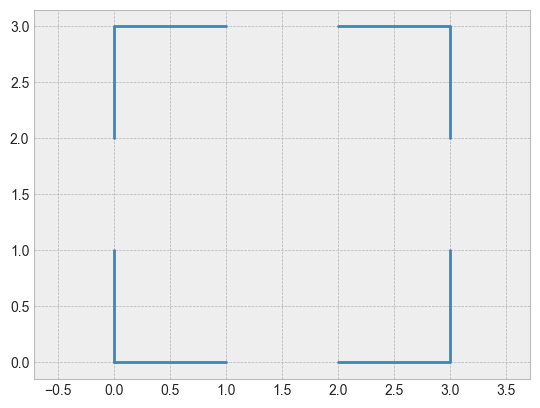

In [15]:
plot_coords(turtle_to_coords(transform_sequence('FFFF', {'F': 'FfF++'})))

In [16]:
def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

print('0:', transform_multiple('abba', {'b': 'bab'}, 0))
print('1:', transform_multiple('abba', {'b': 'bab'}, 1))
print('2:', transform_multiple('abba', {'b': 'bab'}, 2))

0: abba
1: ababbaba
2: ababababbabababa


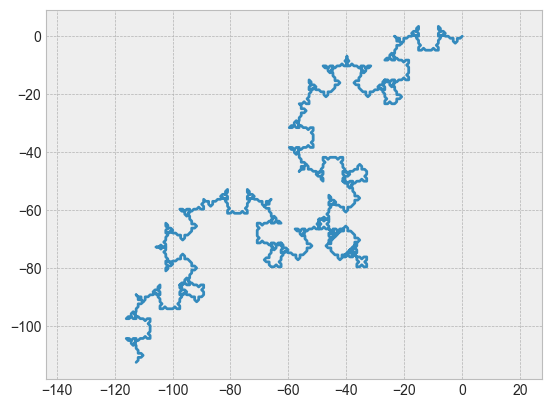

In [17]:
plot_coords(turtle_to_coords(transform_multiple('F', {'F': '+F+F--F+F'}, 5)))

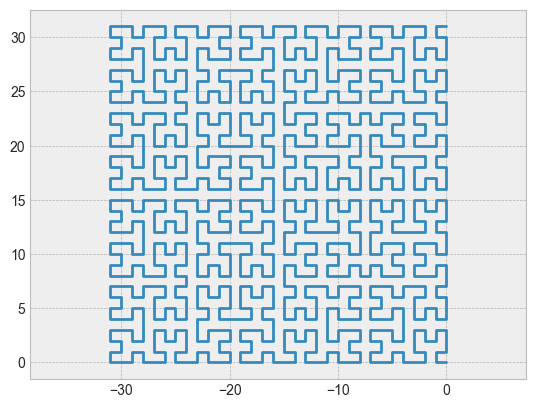

In [18]:
plot_coords(turtle_to_coords(transform_multiple('L', {
        'L': '-RF+LFL+FR-',
        'R': '+LF-RFR-FL+'
}, 5), 90))

In [19]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)

            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

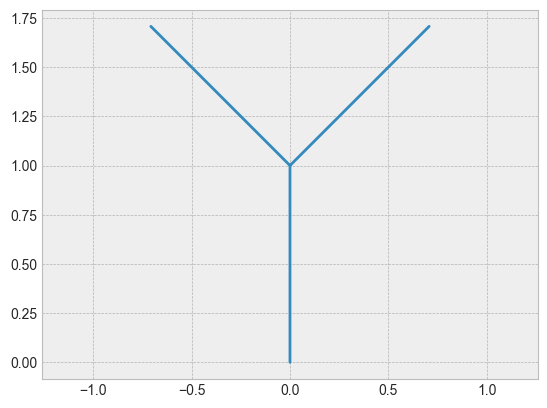

In [20]:
plot_coords(branching_turtle_to_coords('F[-F]+F', 45))

In [21]:
def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

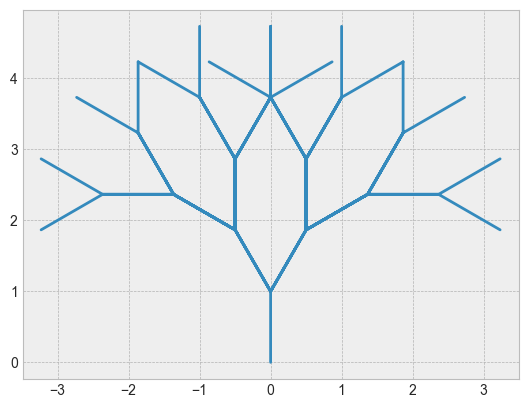

In [22]:
l_plot('F', {'F': 'F[-F][+F]'}, 4, 30)

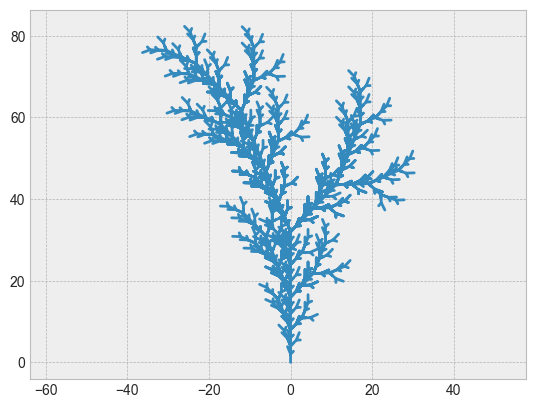

In [23]:
l_plot('F', {'F': 'FF[++F][-FF]'}, 5, 22)

In [24]:
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('A', {'A': 'F+A'}, i))

0:  A
1:  F+A
2:  F+F+A
3:  F+F+F+A
4:  F+F+F+F+A


In [25]:
for i in range(5):
    print('{}: '.format(i),
          transform_multiple('A', {'A': 'F+A', 'F': 'FF'}, i))

0:  A
1:  F+A
2:  FF+F+A
3:  FFFF+FF+F+A
4:  FFFFFFFF+FFFF+FF+F+A


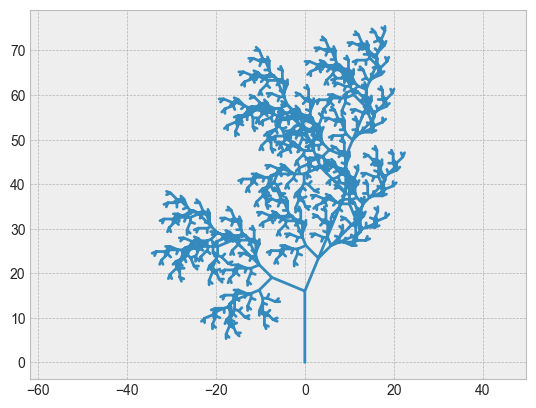

In [26]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import pi, sin, cos, isnan
import numpy as np
from IPython.display import HTML

# Constants
DEGREES_TO_RADIANS = pi / 180

# Reuse your existing functions
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)

            if command.islower():
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':
            state = (x, y, angle + turn_amount)

        elif command == '-':
            state = (x, y, angle - turn_amount)

        elif command == '[':
            saved_states.append(state)

        elif command == ']':
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

# Function to create fractal coordinates for a given iteration
def create_fractal_coords(axiom, transformations, iterations, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = list(branching_turtle_to_coords(turtle_program, angle))
    return coords

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from math import pi, sin, cos, isnan
import numpy as np

# Constants
DEGREES_TO_RADIANS = pi / 180

def create_fractal_animation(axiom, transformations, max_iterations, filename='fractal_animation.mp4',
                             angle=45, fps=2, dpi=200, hardness=0.8):
    """
    Create a fractal animation with customizable color effects.

    Parameters:
    - hardness: Controls color transition sharpness (0.0-1.0)
      - Lower values (0.1-0.3): Softer, more blended colors
      - Higher values (0.7-1.0): Sharper, more distinct color regions
    """
    fig, ax = plt.subplots(figsize=(12, 12), facecolor='black')

    # Store all iterations' coordinates
    all_coords = []
    for i in range(max_iterations + 1):
        coords = create_fractal_coords(axiom, transformations, i, angle)
        all_coords.append(coords)

    # Find bounds for consistent scaling
    all_x = []
    all_y = []
    for coords in all_coords:
        x_vals, y_vals = zip(*coords)
        all_x.extend([x for x in x_vals if not isnan(x)])
        all_y.extend([y for y in y_vals if not isnan(y)])

    x_min, x_max = min(all_x), max(all_x)
    y_min, y_max = min(all_y), max(all_y)

    # Add some padding
    padding = 0.1 * max(x_max - x_min, y_max - y_min)
    ax.set_xlim(x_min - padding, x_max + padding)
    ax.set_ylim(y_min - padding, y_max + padding)
    ax.set_aspect('equal')

    # Create custom colormap - choose vibrant colors
    # More colors for smoother transitions
    colors = [
            "#ff0000", "#ff4000", "#ff8000", "#ffbf00",
            "#ffff00", "#80ff00", "#00ff00", "#00ff80",
            "#00ffff", "#0080ff", "#0000ff", "#8000ff",
            "#ff00ff", "#ff0080"
    ]

    # Create colormap with customizable hardness
    N = int(100 * hardness)  # Higher hardness = fewer colors
    N = max(10, min(N, 500))  # Keep N in reasonable range
    cmap = LinearSegmentedColormap.from_list("rainbow", colors, N=N)

    # Turn off axis for cleaner look
    plt.axis('off')
    ax.set_facecolor('black')  # Dark background to make colors pop

    def animate(i):
        ax.clear()
        ax.set_xlim(x_min - padding, x_max + padding)
        ax.set_ylim(y_min - padding, y_max + padding)
        ax.set_facecolor('black')
        plt.axis('off')

        coords = all_coords[i]
        segments = []
        current_segment = []

        # Group coordinates into segments
        for x, y in coords:
            if isnan(x) or isnan(y):
                if current_segment:
                    segments.append(current_segment)
                    current_segment = []
            else:
                current_segment.append((x, y))

        if current_segment:
            segments.append(current_segment)

        # Plot each segment with different colors
        for j, segment in enumerate(segments):
            if len(segment) > 1:
                x_vals, y_vals = zip(*segment)

                # Color based on both segment index and depth
                depth = len(segment) / 20  # Normalize by typical segment length
                color_val = ((j % 50) / 50 + depth) % 1.0

                # Apply color and vary line width with depth
                depth_factor = 1.0 - min(0.7, depth * 0.1)  # Thinner lines deeper in
                linewidth = 2.5 * depth_factor

                # Apply glow effect to main branches
                if j % 10 == 0 and len(segment) > 5:
                    # Draw background glow
                    ax.plot(x_vals, y_vals, color=cmap((color_val + 0.5) % 1.0),
                            linewidth=linewidth*3, alpha=0.15,
                            solid_capstyle='round')

                # Draw main line
                ax.plot(x_vals, y_vals, color=cmap(color_val),
                        linewidth=linewidth, solid_capstyle='round',
                        alpha=0.95)

        return ax.get_children()

    # Create animation
    ani = animation.FuncAnimation(fig, animate, frames=range(max_iterations + 1),
                                  interval=1000/fps, blit=False)

    # Save animation
    writer = animation.FFMpegWriter(fps=fps)
    ani.save(filename, writer=writer, dpi=dpi)

    plt.close(fig)
    print(f"Animation saved as {filename}")
    return filename

# Try different fractal patterns with customized hardness values

# Dragon Curve - sharp color transitions
fractal_file = create_fractal_animation(
        axiom='F',
        transformations={'F': 'F+G', 'G': 'F-G'},
        max_iterations=10,
        angle=90,
        fps=4,
        filename='dragon_curve.mp4',
        hardness=0.9  # Sharp color transitions
)

# Plant-like - soft color transitions
fractal_file = create_fractal_animation(
        axiom='F',
        transformations={'F': 'FF[++F][-FF]'},
        max_iterations=5,
        angle=22,
        fps=3,
        filename='colorful_plant.mp4',
        hardness=0.3  # Soft color blending
)

# Tree - medium color transitions
fractal_file = create_fractal_animation(
        axiom='A',
        transformations={'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'},
        max_iterations=4,
        angle=22.5,
        fps=2,
        filename='fractal_tree.mp4',
        hardness=0.6  # Medium color transitions
)

# Snowflake fractal - hard distinct colors
fractal_file = create_fractal_animation(
        axiom='F++F++F',
        transformations={'F': 'F-F++F-F'},
        max_iterations=4,
        angle=60,
        fps=2,
        filename='snowflake.mp4',
        hardness=1.0  # Maximum color distinction
)

Animation saved as dragon_curve.mp4
Animation saved as colorful_plant.mp4
Animation saved as fractal_tree.mp4
Animation saved as snowflake.mp4


In [ ]:
# Plant-like - soft color transitions
fractal_file = create_fractal_animation(
        axiom='F',
        transformations={'F': 'FF[++F][-FF]'},
        max_iterations=10,
        angle=22,
        fps=24,
        filename='colorful_plant.mp4',
        hardness=0.3  # Soft color blending
)